<b><center>
<span style="font-size: 24pt; line-height: 1.2">
E6156 $-$ Topics in SW Engineering: <br>Cloud Computing<br>
    <i>Backend-as-a-Service</i>
</span>
</center></b>
<br>
<p>
<i><center>
<span style="font-size: 20pt; line-height: 1.2">
Lecture 3: Web Applications, REST Continued, IaaS, CI/CD, Static Web Content<br><br>
(Draft 0.8)
</span>
</center></i>


In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))
display(HTML("<style>.output_result { max-width:80% !important; }</style>"))
display(HTML("<style>.prompt { display:none !important; }</style>"))

# Today's Lecture

1. Web application structure.<br><br>

1. REST API: Reprised and  expanded.<br><br>

1. Infrastructure-as-a-Service and EC2.<br><br>

1. Web Content and Content Delivery Networks.<br><br>

1. Continuous Integration, Continuous Development, Code Pipeline<br><br>

<br>

# Multi-Tier and Web Applications

<br>

## Overview

<br>

| <img src="../../images/mult-tier-application.jpg"> |
| :---: |
| __Application Architecture__ |


| <img src="../../images/webapp.jpeg"> |
| :---: |
| __Application Structure__ |

<br>

## UI

1. The UI, which consists of:
    - Static content that the browser renders: HTML, images, ...
    - Models: JavaScript files that provide data and APIs, and which call the microservice for functions.
    - Controllers: JavaScript files that coordinate the UI and models.


- There are two common frameworks/patterns for building UIs:
    1. Model-View-Controller
    2. Model-View-View-Model
    3. Model-View-Presenter
    
    
- Again, this is not a UI/user experience course. I do not care which framework you use. There is a lot of documentation on the approaches, and on frameworks, libraries and tools.
    
<br>

<hr style="height:2px;">

| <img src="../../images/mvc_microservice.jpg"> |
| :---: |
| __Model-View-Controller__ |

<hr style="height:2px;">

<br>

<br>

<hr style="height:2px;">

| <img src="../../images/mvvm.jpg" width="1000px"> |
| :---: |
| __Model-View-Viewmodel__ |

<hr style="height:2px;">

<br>

- For a browser based application, the files come from a web (HTTP) sever.
    - Simple scenarios sometimes use the application server to deliver the UI content and implement services.
    - This never occurs in production. The engineering design points for delivery web content and executing services are completely different.
    - One SW system will not be good at both tasks.


<br>

## Data Access Layer

<br>

<hr>

| <img src="../../images/dao.jpg"> |
| :---: |
| __Data Access Layer/Object__ |

<hr>

<br>

- General best practice: Do not put database specific/schema specific API calls in "business logic."<br><br>

- From [Wikipedia]():
    - "A data access layer (DAL) in computer software is a layer of a computer program which provides simplified access to data stored in persistent storage of some kind, such as an entity-relational database.
    - "If the data access layer supports multiple database types, the application becomes able to use whatever databases the DAL can talk to. In either circumstance, having a data access layer provides a centralized location for all calls into the database, and thus makes it easier to port the application to other database systems (assuming that 100% of the database interaction is done in the DAL for a given application)."<br><br>

- [Also](https://en.wikipedia.org/wiki/Data_access_object): "a data access object (DAO) is a pattern that provides an abstract interface to some type of database or other persistence mechanism. By mapping application calls to the persistence layer, the DAO provides some specific data operations without exposing details of the database. This isolation supports the single responsibility principle. It separates what data access the application needs, in terms of domain-specific objects and data types (the public interface of the DAO), from how these needs can be satisfied with a specific DBMS, database schema, etc." <br><br>
    
- There are many, many tools and frameworks supporting the DAL pattern.<br><br>


<br>

- I afflicted this pattern on those of you from my database course with the dreaded ```XXXDataTable.```<br><br>

<hr>

| <img src="../../images/data_table.png"> |
| :---: |
| __Dreaded XXXDataTable__ |

<hr>
<br>

<hr>

| <img src="../../images/what-theyre-back.jpeg" width="900px"> |
| :---: |
| __They're Back__ |

<hr>
<br>


<br>

## Business Logic Layer

<br>

- The business logic layer implements the core capabilities of the application, and is independent of
    - The calling application: Browser, iPhone, other microservice, API gateway, ... ...
    - The specifics of the database engine and schema.<br><br>
    
- A microservice implements a "single business function." The concept is vague and relies on architect's experience.<br><br>

- There are several design patterns and anti-patterns that apply to the business logic layer.<br><br>

<br>

<hr>

| <img src="../../images/composer_data_pattern.png" width="900px"> |
| :---: |
| __Some Design Patterns__ |

<hr>
<br>

<br>

- [From Wikipedia](https://en.wikipedia.org/wiki/Software_design_pattern): "In software engineering, a software design pattern is a general, reusable solution to a commonly occurring problem within a given context in software design. It is not a finished design that can be transformed directly into source or machine code. Rather, it is a description or template for how to solve a problem that can be used in many different situations. Design patterns are formalized best practices that the programmer can use to solve common problems when designing an application or system."<br><br>

- You will also hear the terms "architecture pattern," "data design pattern," "microservice pattern," ... ... <br><br>

<hr>

| <img src="../../images/MicroservicePatternLanguage.jpg" width="900px"> |
| :---: |
| [Microservice Patterns](https://microservices.io/patterns/) |

<hr>
<br>

- The most important question you should ask yourself when working on a SW implementation problem is, "Am I the first person who every tried to ... ...?"
    - The answer is almost always, "No!!!"
    - If the answer is "Yes," you might want to ponder why.<br><br>
    
- The most important question you should learn is,<br><br>


"Dear Google,<br><br>
I hope the inquiry finds you in good health. I am struggling with a problem. Do you have any information on ... ...?"

<br>



<br>

# REST (APIs)

<br>

## Introduction
<br>

- "Representational State Transfer (REST) is a software architectural style that defines a set of constraints to be used for creating Web services. Web services that conform to the REST architectural style, called RESTful Web services (RWS), provide interoperability between computer systems on the Internet. RESTful Web services allow the requesting systems to access and manipulate textual representations of Web resources by using a uniform and predefined set of stateless operations." (https://en.wikipedia.org/wiki/Representational_state_transfer)


- REST has six characteristics, which we will cover:
    1. Uniform interface
    2. Client–server
    3. Stateless
    4. Cacheable
    5. Layered system
    6. Code on demand (optional)
    
<br>
<hr style="height:3px">

| <img src="../../images/rest_api.jpg" width="900px"> |
| :---: |
| [REST APIs](https://restful-api-design.readthedocs.io/en/latest/scope.html) |

<hr style="height:3px">
<br>

<br>

## The Web is a "Database" of "Linked Data"

<br>

- Almost all database engines and models have the concepts of
    - Objects that are some form of array of (name, value) pairs.
    - Sets of similar or related objects.
    - Four basic (CRUD) operations on a set
        - CREATE a new object and add to a set.
        - RETRIEVE an object in a set based on a criteria.
        - UPDATE an object in a set, e.g. change the data in the object.
        - DELETE an object from a set, specifying the object(s) by some criteria.<br><br>
        
        
- In the file systems/CSV model (HW 1a)
    - A set is a file, e.g. People.csv.
    - Each object is a row in the file.
    - The header row gives the names of each column.
    - The CRUD processing involves writing a program that reads the file, changes the two-dimensional array and writing the file.
        - CREATE: Append a row and save the file.
        - RETRIEVE: Scan the table and apply some kind of IF statement.
        - UPDATE: Change a row in the two dimensional array.
        - DELETE: Remove a row from the array.<br><br>
        

- In the "pure" relational model
    - A set is a _relation_.
    - An object is a _row_ or _tuple_.
    - There is no support for CREATE, UPDATE or DELETE.
    - There is an _algebra_ and language from producing a new relation from existing relations that implements a support set of RETRIEVE.<br><br>
    
    
- In SQL,
    - A set is a _table_.
    - An object is a _row_ or _tuple_.
    - INSERT is the create operation.
    - UPDATE is the delete operation.
    - DELETE is the delete operation.
    - SELECT is the statement that realizes the relational _algebra_.<br><br>
    
    
- In the web (http) and [Representational state transfer](https://en.wikipedia.org/wiki/Representational_state_transfer) REST.
    - A set is a _resource_ that is a collection of _resources._
    - An object is a resource.
    - CREATE is HTTP POST
    - RETRIEVE is HTTP GET
    - UPDATE is HTTP PUT (or PATCH)
    - DELETE is HTTP DELETE.<br><br>
    

<br>

## Resource Oriented

<br>

<hr>

| <img src="../../images/rest_concepts.png"> |
| :---: |
| [Resource Concept](https://restful-api-design.readthedocs.io/en/latest/resources.html) |

<hr>

<br>

"The fundamental concept in any RESTful API is the resource. A resource is an object with a type, associated data, relationships to other resources, and a set of methods that operate on it. It is similar to an object instance in an object-oriented programming language, with the important difference that only a few standard methods are defined for the resource (corresponding to the standard HTTP GET, POST, PUT and DELETE methods), while an object instance typically has many methods.

Resources can be grouped into collections. Each collection is homogeneous so that it contains only one type of resource, and unordered. Resources can also exist outside any collection. In this case, we refer to these resources as singleton resources. Collections are themselves resources as well.

Collections can exist globally, at the top level of an API, but can also be contained inside a single resource. In the latter case, we refer to these collections as sub-collections. Sub-collections are usually used to express some kind of “contained in” relationship. We go into more detail on this in Relationships." (https://restful-api-design.readthedocs.io/en/latest/resources.html)

<br>

<hr>

- Simplistic mapping to relational/SQL
    - Collection is a table.
    - Resource is a row/tuple.
    - Sub-resource is a _dependent entity_ (aka _weak entity._)
    - Sub-resource collection is the set of dependent entities that are dependent on/contained by the containing resource.
    
"In a relational database, a weak entity is an entity that cannot be uniquely identified by its attributes alone; therefore, it must use a foreign key in conjunction with its attributes to create a primary key. The foreign key is typically a primary key of an entity it is related to." (https://en.wikipedia.org/wiki/Weak_entity)<br>

| <img src="../../images/orders_weak.jpeg"> |
| :---: |
| __Relationships__ |

- In the [classic cars database example:](http://www.mysqltutorial.org/mysql-sample-database.aspx)
    - _orderdetails_ is a dependent/weak entity/sub-resource that _orders_ logically contains.
    - The relationship is different than the relationship between _customers_ and _orders_ or _orderdetails_ and _products._

<br>

## API and Protocol

<br>

| <img src="../../images/http_rest_protocol.jpeg" > |
| :---: |
| __HTTP and REST__ |

- The CRUD verbs are:
    - ```POST```
    - ```GET```
    - ```PUT``` (some designs use ```PATCH``` instead of ```PUT.```)
    - ```DELETE```

- The CRUD verbs occur on resources that a ```URL``` (```PATH```) identify.


- - "A Uniform Resource Locator (URL), colloquially termed a web address, is a reference to a web resource that specifies its location on a computer network and a mechanism for retrieving it. A URL is a specific type of Uniform Resource Identifier (URI), although many people use the two terms interchangeably. URLs occur most commonly to reference web pages (http), but are also used for file transfer (ftp), email (mailto), database access (JDBC), and many other applications." (https://en.wikipedia.org/wiki/URL)


- A URL has the format


```URI = scheme:[//authority]path[?query][#fragment]```


- The components are:
    1. Scheme: Information about the protocol, connector library, ...
    2. Authority: Usually ```userid:password```.
    3. Path: File system like folder path to the resource.
    4. We will cover query string later.
    5. Fragment: A location or subset of the resource, e.g. a section with heading.
    
- URL paths have a pattern in most applications

| Path | Mapping |
| :---: | :--- |
| /api	| The API entry point |
| /api/:coll	| A top-level collection named “coll” |
| /api/:coll/:id	| The resource “id” inside/related to collection “coll” |
| /api/:coll/:id/:subcoll	| Sub-collection “subcoll” under resource “id” |
| /api/:coll/:id/:subcoll/:subid	| The resource “subid” inside “subcoll” |


- Path examples:
    - ```/api/GoT/seasons```
    - ```/api/GoT/characters/CH_12```
    - ```/api/GoT/characters/CH_12/scenes```
    
    
- Query string:

"On the internet, a query string is the part of a uniform resource locator (URL) which assigns values to specified parameters. The query string commonly includes fields added to a base URL by a Web browser or other client application, for example as part of an HTML form.

A web server can handle a Hypertext Transfer Protocol request either by reading a file from its file system based on the URL path or by handling the request using logic that is specific to the type of resource. In cases where special logic is invoked, the query string will be available to that logic for use in its processing, along with the path component of the URL." (https://en.wikipedia.org/wiki/Query_string)


- Query string example:
    - ```http://127.0.0.1/api/GoT/characters?characterName=Sansa Stark```
    - maps to
    - ```SELECT * FROM characters where characterName='Sansa Stark'```
    
    
- There is no standard way to specify _project._ A common convent is ```fields=f1,f2,...```


- Full example:
    - ```http://127.0.0.1/api/GoT/characters?characterName=Sansa Stark&fields=characterName,nickName```
    - maps to
    - ```SELECT characterName, nickname FROM characters where characterName='Sansa Stark'```
    
    
- These are very common conventions, which we will use for HW2. Applications and frameworks also use other conventions.

- ```limit``` and ```offset``` implement _pagination._

"Currently, when an HTTP GET request is issued on ... route, all of the table's rows are returned. This may not be a big deal with only 107 rows in ... table, but imagine what would happen if the table contained thousands or millions of rows. Clients such as mobile and web apps generally consume and display only a fraction of the rows available in the database and then fetch more rows when needed — perhaps when a user scrolls down or clicks the "next" button on some pagination control in the UI.

To allow for this, REST APIs need to support a means of paginating the results returned. Once pagination is supported, sorting capabilities become important as data usually needs to be sorted prior to pagination being applied. Additionally, a means of filtering data is very important for performance. Why send data from the database, through the mid-tier, and all the way to the client if it's not needed?" (https://dzone.com/articles/creating-a-rest-api-manual-pagination-sorting-and)


- You have seen that I have to do pagination when submitting queries to MySQL from Jupyter notebooks. If I do not use ```LIMIT,``` the amount of returned data causes the Jupyter notebook/browser to freeze/lock-up.

<br>

## Details and Context

<br>

__Go through REST presentation__


<br>

## Stateless-ness

<br>

- Most of the REST principles are pretty clear.<br><br>

- Stateless is the one that baffles people and is often misunderstood.<br><br>

- The server _clearly_ has long-lived state information, e.g.
    - Account balances.
    - Customer contact information.
    - Product catalog information in a database.
    - etc.<br><br>
    
    
- Client-Server interactions have two types of state:
    - Resource state
    - Conversation/Session<br><br>
    
    
- "In computer science, in particular networking, a session is a temporary and interactive information interchange between two or more communicating devices, or between a computer and user." (https://en.wikipedia.org/wiki/Session_(computer_science))<br><br>

<br>

<hr>

| <img src="../../images/session-state.jpeg"> |
| :---: |
| __Session/Conversation Start__ |

<hr>

<br>

<hr>

| <img src="../../images/http_session.jpg"> |
| :---: |
| __HTTP Session__ |

<br>

- Database cursors are an example of conversation state.<br><br>


- Example stateful "service" using cursors.


In [ ]:
import pymysql.cursors
import pandas as pd
import json


cnx = pymysql.connect(host='localhost',
                             user='dbuser',
                             password='dbuserdbuser',
                             db='lahman2019clean',
                             charset='utf8mb4',
                             cursorclass=pymysql.cursors.DictCursor)

cursor = cnx.cursor()


def get_by_last_name(lastName, birthState):
    cursor.execute("select playerID, nameLast, NameFirst, birthCity, birthState, birthYear " +
                   " from people where nameLast=%s and birthState=%s",(lastName, birthState));
    r = cursor.fetchone()
    return r

def get_next():
    print("Using existing cursor  = ", cursor)
    r = cursor.fetchone()
    return r

<br>

- Example stateful client for stateful server.

<br>

In [ ]:


first = get_by_last_name("Williams", "CA")

print("First = ", first)

done = False
while not done:
    next = get_next()
    if next is None or len(next) == 0:
        done = True
    else:
        print("Next = ", next)

<br>
- The server side, e.g. the database, remembers the last position with a cursor. This is session state.<br><br>


- Statelessness in REST means that the server does not maintain conversation state.<br><br>


- All requests from the client are complete and self-contained.<br><br>


- The server _may_ return state to the client that the client must return on subsequent requests. $\Rightarrow$<br>The client maintains any conversation state the server requires.<br><br>

<hr>

| <img src="../../images/rest_client.jpg" width="700px">|
| :---: |
| [REST Self-Contained Messages](http://mrbool.com/rest-architectural-elements-and-constraints/29339) |

<hr>
<br>

- Stateless server example.<br><br>

In [ ]:
import pymysql.cursors
import pandas as pd
import json


cnx = pymysql.connect(host='localhost',
                             user='dbuser',
                             password='dbuserdbuser',
                             db='lahman2019clean',
                             charset='utf8mb4',
                             cursorclass=pymysql.cursors.DictCursor)


def get_by_last_name_offset(lastName, birthState, offset=0):
    print("Making a new cursor for this request, because I know the offset = ", offset)
    cursor=cnx.cursor()
    cursor.execute("select playerID, nameLast, NameFirst, birthCity, birthState, birthYear " +
                   " from people where nameLast=%s and birthState=%s " +
                   "limit 1 offset %s",(lastName, birthState, offset))
    r = cursor.fetchone()
    cursor.close()
    return r, offset+1

<br>
- Statless client example.
<br><br>

In [ ]:
done = False
offset = 0

while not done:
    next, offset = get_by_last_name_offset("Williams", "CA", offset)
    if next is None or len(next) == 0:
        done = True
    else:
        print("Next = ", next)
        print("Next record offset is", offset)

<br>
<br>
- The caller remembers the position, and does not rely on a cursor.<br><br>
 
- Is there a concern about the client modifying or tinkering with the state information?<br><br>


- Yes, and the server can encrypt the session state information to prevent tampering.<br><br>


- Facebook example<br><br>

<hr>

| <img src="../../images/facebook-request.jpg"> |
| :---: |
| __Sample Facebook Request__ |

<hr>

<br>

- The Facebook request contains an encrypted _access token._ "In computer systems, an access token contains the security credentials for (...) identifies the user, the user's groups, the user's privileges, and, in some cases, a particular application." (https://en.wikipedia.org/wiki/Access_token)<br><br>


- The response contains hashed and encrypted session state that MUST be returned to continue the conversational interaction.<br><br>


- We will see concrete examples when we implement security and [pagination](https://docs.microsoft.com/en-us/azure/architecture/best-practices/api-design)<br><br>

<br>

# IaaS and Elastic Cloud Compute

<br>

- We will go through the general IaaS concepts, benefits, ... ... in a recitation or future lecture.<br><br>

- I want to do a hands-on walk through to make sure you can set up a VM on AWS.<br><br>

# Continuous Integration/Continuous Development

<br>

- We will go through the general CICD concepts, benefits, ... ... in a recitation or future lecture.<br><br>

- I want to do a hands-on walk through to make sure you can set up a pipeline.<br><br>

# Static Web Hosting, S3 and CDN/CloudFront

<br>

- We will go through the general CICD concepts, benefits, ... ... in a recitation or future lecture.<br><br>

- I want to do a hands-on walk through to make sure you can set up a pipeline.<br><br>



<br>

# Milestone 1 and 2

<br>

<hr>

| <img src="../../images/milestone_1_2.png"> |
| :---: |
| __Milestone 1 and 2__ |

<hr>

<br>

__Trello walkthrough__

<br>

# AWS Account Structure

<br>

- In the past, I have used "class credits" instead of "Educate Classroom."<br><br>

- AWS Educate Classrooms seems not to fit much of what we are trying to do.<br><br>

- In the interim,
    - Set up non-classroom, individual, personal AWS accounts.
    - You can divide the milestone 1 tasks among the team.
    - You can independently do the tasks on your own accounts with a shared GitHub repository.<br><br>
    - Stay in the free-tier.<br><br>
    
    
- I am working on a better solution.<br><br>



# APIs and API Management

<br>

## An Ode to APIs
<br><br>

From [Forbes.com](https://www.forbes.com/sites/falonfatemi/2019/04/30/3-keys-to-a-successful-api-strategy/#449d58e678ee)
<br><br>
- The “API Economy” is much more than just a buzz phrase. It’s become a key enabler of digital transformation and agile businesses. In a recent report, McKinsey explains, “As the connective tissue linking ecosystems of technologies and organizations, APIs allow businesses to monetize data, forge profitable partnerships, and open new pathways for innovation and growth.”


- Businesses of all shapes and sizes are reaping benefit from APIs. According to a Harvard Business Review article, Salesforce has generated half of its revenue to through APIs, while Expedia.com has generated a whopping impressive 90% in recent years. APIs have become so essential to businesses that 85% consider web APIs and API-based integration fundamental to their business strategy and continued success. Before implementing an API, it's important to carefully consider what's entailed in a successful API strategy.
<br><br>

From [apiacademy.com](https://apiacademy.co/2015/04/api-strategy-102-the-business-value-of-apis/)

Broadly speaking, any organization that is launching an API program will be aiming to achieve one or more of the following business goals:

1. Increasing Revenue Often an API can be a direct source of revenue. This may involve charging developers for access to the API, facilitating the in-house creation of pay-to-play applications or enabling ecommerce. A key consideration here is that the API must offer something worth paying for.

2. Extending Customer Reach & Value APIs provide the ideal solution for enterprises that wish to reach new customers or increase the value of current customers by offering existing services via new platforms and devices. In these instances, it is vital to consider technical requirements for these new delivery channels.

3. Supporting Sales & Marketing Activities APIs can also help a company to market its products and services, without necessarily becoming involved in how these offerings are delivered. Such an API should enable the creation of the kind of engaging, immersive functionality associated with online marketing best practices.

4. Stimulating Business & Technical Innovation APIs can help an organization develop new systems, offerings and strategies from the inside because they reduce technical barriers to innovation. Specifically, APIs empower organizations to generate and implement ideas without requiring them to change their backend systems.

5. Easing Integration of Backend Data & Applications APIs also play a key integration role in a variety of internal IT projects that impact core business goals. In these projects, it is vital to consider the business event or need driving the integration. For example, the integration may result from a merger or from a new regulatory requirement.

<br><br>
__There are dozens of sites that sing the joys of APIs.__


## API Management

From [Wikipedia]()
<br><br>
API management is the process of creating and publishing web application programming interfaces (APIs), enforcing their usage policies, controlling access, nurturing the subscriber community, collecting and analyzing usage statistics, and reporting on performance. API Management components provide mechanisms and tools to support developer and subscriber community


While solutions vary, components that provide the following functionality are typically found in API management products:

- __Gateway:__ a server that acts as an API front-end, receives API requests, enforces throttling and security policies, passes requests to the back-end service and then passes the response back to the requester. A gateway often includes a transformation engine to orchestrate and modify the requests and responses on the fly. A gateway can also provide functionality such as collecting analytics data and providing caching. The gateway can provide functionality to support authentication, authorization, security, audit and regulatory compliance.
It can be implemented by a Reverse proxy.


- __Publishing tools:__ a collection of tools that API providers use to define APIs, for instance using the OpenAPI or RAML specifications, generate API documentation, govern API usage through access and usage policies for APIs, test and debug the execution of API, including security testing and automated generation of tests and test suites, deploy APIs into production, staging, and quality assurance environments, and coordinate the overall API lifecycle.


- __Developer portal/API store:__ community site, typically branded by an API provider, that can encapsulate for API users in a single convenient source information and functionality including documentation, tutorials, sample code, software development kits, an interactive API console and sandbox to trial APIs, the ability to subscribe to the APIs and manage subscription keys such as OAuth2 Client ID and Client Secret, and obtain support from the API provider and user and community.


- __Reporting and analytics:__ functionality to monitor API usage and load (overall hits, completed transactions, number of data objects returned, amount of compute time and other internal resources consumed, volume of data transferred). This can include real-time monitoring of the API with alerts being raised directly or via a higher-level network management system, for instance, if the load on an API has become too great, as well as functionality to analyze historical data, such as transaction logs, to detect usage trends. Functionality can also be provided to create synthetic transactions that can be used to test the performance and behavior of API endpoints. The information gathered by the reporting and analytics functionality can be used by the API provider to optimize the API offering within an organization's overall continuous improvement process and for defining software Service-Level Agreements for APIs.


- __Monetization:__ functionality to support charging for access to commercial APIs. This functionality can include support for setting up pricing rules, based on usage, load and functionality, issuing invoices and collecting payments including multiple types of credit card payments.

## API Gateway

<hr>

| <img src="../../images/api_gw_kong.png"> |
| :---: |
| [The Role of API Gateways in Microservice Architectures](https://thenewstack.io/api-gateways-age-microservices/) |

<hr>

- API Gateways implement complex, valuable functions.<br><br>
- Provide a model for injecting (infrastructure) capabilities via:
    - Plug-in modules.
    - Configurable pipelines.
<br><br>

- Like everything in the course, the topic space is complex and it is easy to "go wild" with the concept.
<br><br>

- We will do some useful but simple things with the Amazon API Gateway.

<hr>

| <img src="../../images/amazon_api_gw.png"> |
| :---: |
| __Amazon API Gateway__ |

<hr>


# System Architecture

<br>
        
| 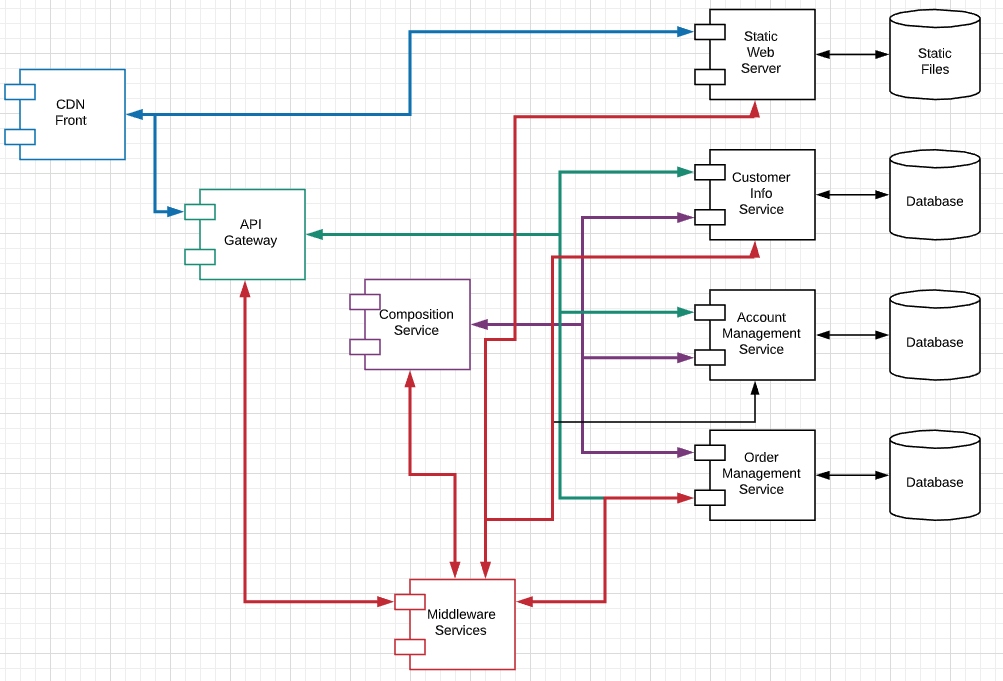 |
| :---: |
| __Microservice Architecture__ |

# Milestone 1 (13-Sep-2020)

1. Develop and execute three "hello world" microservices
    1. Services:
        1. CustomerInfo
        2. AccountManagement
        3. OrderManagement
    2. One service must by in Python/Flask. One service must be in NodelJS.
    3. Each microservice must:
        - Return a "Hello World" HTML page describing the service.
        - Support one REST endpoint ```/service_info``` that return some simple information in JSON.
       
       
2. You may develop and test locally on your laptops.


3. Each microservice will be its own Github repository that you share.


4. Signup for an AWS free-tier account for your team and add your team members.


5. Your deliverable is a short, status report document. I will provide a template.


6. Ideally, you will do a demo (or attend a demo) with the TAs and me.


7. In milestone #2, we will deploy onto the cloud:
    - Static content will go onto S3.
    - One service will deploy on each of:
        - Elastic Beanstalk
        - Elastic Container Service
        - Elastic Compute Service
        